# What is an API

Python Demo File Location - `C:\Program Files\MIDAS\midas Civil\Tutorial` - Open First

Amtrak Station Demo Location - `C:\Users\dane.parks\Projects\Pittsburgh Amtrak Station`

API's are "Application Programming Interfaces" and it's the specific set of rules and commands that software utilizes to communicate with each other.

The most commonly utilized standard/format for a modern api is arguably a "Restful API utilizing https", Rest API's typically consist of a URL, and a payload. HTTP in this case is the `protocol` which is more strictly defined, while RESTful describes the `architecture` which is a more [general set of guidelines](https://www.redhat.com/en/topics/api/what-is-a-rest-api). Sometimes the payload is empty, sometimes it includes data. If you right click on any website and select "inspect" then go to the sources tab, you can see a summary of the various http requests your browser is making within the `Network` tab. 

For Example:

[ODOT ESRI Rest API](https://gis.dot.state.oh.us/tims/map)

Https protocol often returns the HTML, JavaScript and CSS files/code that make up a website. RESTful APIs often just return data. The API often expects payloads in specific formats such as `Cookies` (generally not used in RESTful APIs) or `Headers`.

# MIDAS API

MidasSoft has released a new version of Midas Civil, `MIDAS Civil NX` with this update comes a new layout, and more relevant to this presentation, a RESTful API. Since RESTful APIs are pretty conceptually basic, they can generally be utilized in any programming language. For instance

**in VBA:**

```VBA
Option Explicit

Sub Test_LateBinding()

    Dim objRequest As Object
    Dim strUrl As String
    Dim blnAsync As Boolean
    Dim strResponse As String

    Set objRequest = CreateObject("MSXML2.XMLHTTP")
    strUrl = "https://w3schools.com"
    blnAsync = True

    With objRequest
        .Open "GET", strUrl, blnAsync
        .SetRequestHeader "Content-Type", "application/json"
        .Send
        'spin wheels whilst waiting for response
        While objRequest.readyState <> 4
            DoEvents
        Wend
        strResponse = .ResponseText
    End With

    Debug.Print strResponse

End Sub
```

**in C#:**

```C#
static async Task<Product> GetProductAsync("https://w3schools.com")
{
    Product product = null;
    HttpResponseMessage response = await client.GetAsync(path);
    if (response.IsSuccessStatusCode)
    {
        product = await response.Content.ReadAsAsync<Product>();
    }
    return product;
}
```

**in C++:**

```C++
#include <curlpp/cURLpp.hpp>
#include <curlpp/Options.hpp>

// RAII cleanup

curlpp::Cleanup myCleanup;

// Send request and get a result.
// Here I use a shortcut to get it in a string stream ...

std::ostringstream os;
os << curlpp::options::Url(std::string("https://w3schools.com"));

string asAskedInQuestion = os.str();
```

**In Java:**

```Java
// Create a neat value object to hold the URL
URL url = new URL("https://w3schools.com");

// Open a connection(?) on the URL(??) and cast the response(???)
HttpURLConnection connection = (HttpURLConnection) url.openConnection();

// Now it's "open", we can set the request method, headers etc.
connection.setRequestProperty("accept", "application/json");

// This line makes the request
InputStream responseStream = connection.getInputStream();

// Manually converting the response body InputStream to APOD using Jackson
ObjectMapper mapper = new ObjectMapper();
APOD apod = mapper.readValue(responseStream, APOD.class);

// Finally we have the response
System.out.println(apod.title);
```

**In JavaScript:**

```JavaScript
const userAction = async () => {
  const response = await fetch('https://w3schools.com');
  const myJson = await response.json(); //extract JSON from the http response
  // do something with myJson
}
```

**In Python:**

```python
import requests

x = requests.get('https://w3schools.com')
print(x.content)
```

For the sake of brevity and in the interest of writing code easily followed by the target audience, we'll stick with python throughout the demonstration. Python's brevity doesn't make it "better" than one language or another, but generally it's considered to be one of the more approachable "full-featured" programming languages due to it's simplicity. Other languages are generally more "Verbose" meaning the user has to spell out specifically what they're trying to do with the function and how they want it to perform. Python tends to make a lot of assumptions, which the user can override later if necessary.

# API Vs OOP

The creation of the API doesn't solve all our MIDAS and output woes. The API is just the "Communication" layer between MIDAS and other software. Whether that includes tables in Excel, visual analysis result elements, reports in .pdf format, or attributes regarding specific elements we're trying to model, the definitions and explict instructions still have to be crafted and correctly sent to the API. Python's version of modeling objects in the real world is a concept called Object Oriented Programming, where the language focus's on modeling `objects`. Objects can be a physical object or a conceptual object that only exists in the computer's memory, the import thing is to remember, is that objects are the 'Nouns' of programming.

Objects in python are defined utilizing the `class` keyword.

The other side of OOP, is the 'verbs' verbs are the functions, they can either be associated with an object, or independent of them. They are defined using the `def` keyword, here's a basic example of all three. Lines starting with `#` are comments, they have no effect on the code that's being run.

## Basic OOP in Python

In [1]:
# Define a function that performs a sum, takes the inputs a & b, returns the sum of them, defined outside of a class
def independent_sum(a, b):
    return a + b

In [2]:
independent_sum(4, 6)

10

In [3]:
# Defining an `object` in python, objects generally describe Nouns
class Person:
    def __init__(
        self, height
    ):  # Objects are initialized by a special __init__ function in python, this is where inputs are defined
        self.height = height  # Attributes are assigned to 'self' in python objects, that means that height is an attribute of the person

    def grow_2_inches(self):
        self.height = self.height + (
            2 / 12
        )  # Object `Methods` in python are functions specific to that object

In [4]:
# When you use a class in python assigned to a variable, you are intializing that object
Timmy = Person(6)  # Timmy is a person that's 6' tall
print(Timmy.height)  # Note Technically everything in python is an "object"

6


In [5]:
Timmy.grow_2_inches()  # This function makes timmy grow 2 inches
print(Timmy.height)

6.166666666666667


## Other Programming Aspects to Python

[More extensive list](https://www.w3schools.com/python/python_datatypes.asp), lists and dictionaries are more relevant to the API and are the only Data types covered here.

In [6]:
# How to define a list in python
example_list = [1, 2, 3, 4, 5, 6, 7]

In [9]:
# Dictionaries in python
example_dict = {"1": 1, "2": 2, "3": "Dog", "4": 4}

Lists are reference by their `index`, dicts are referenced by their `keys`.

In [10]:
print(example_list[0])  # Returns the first value in the list, note 0 = first item
print(example_dict["3"])  # Returns the value in the dict with key value 1

1
Dog


## Loops

Loops play an important role in essentially all imperitive programming languages,

In [11]:
for value in example_list:
    print(value)

1
2
3
4
5
6
7


In [12]:
# Same premise as above for dicts
for key, value in example_dict.items():
    print(f"Key: {key}, Value: {example_dict[key]}")

Key: 1, Value: 1
Key: 2, Value: 2
Key: 3, Value: Dog
Key: 4, Value: 4


## How This Relates to the API

The API returns JSON responses. There are [introductary examples located here](https://midas-support.atlassian.net/wiki/spaces/MAW/overview?homepageId=83821132). But just like with the requests package above, the benefit of python is that packages can be developed that let you utilizing programming functions with minimal amounts of code. Note that the JSON format is extremely similar to the python dictionary format.

In [14]:
from civilpy.structural.midas import midas_api, get_elements, get_api_key

Output directory already exists


In [22]:
get_api_key(r"C:\Users\dane.parks\PycharmProjects\civilpy\secrets.json")

# Run this before activating the API to show the MIDAS Errors, then activate and run again
elements = get_elements()
elements

{'ELEM': {'589': {'TYPE': 'BEAM',
   'MATL': 1,
   'SECT': 19,
   'NODE': [447, 869, 0, 0, 0, 0, 0, 0],
   'ANGLE': 0,
   'STYPE': 0},
  '776': {'TYPE': 'BEAM',
   'MATL': 1,
   'SECT': 19,
   'NODE': [427, 880, 0, 0, 0, 0, 0, 0],
   'ANGLE': 0,
   'STYPE': 0},
  '861': {'TYPE': 'BEAM',
   'MATL': 1,
   'SECT': 13,
   'NODE': [1430, 425, 0, 0, 0, 0, 0, 0],
   'ANGLE': 0,
   'STYPE': 0},
  '862': {'TYPE': 'BEAM',
   'MATL': 1,
   'SECT': 13,
   'NODE': [1431, 426, 0, 0, 0, 0, 0, 0],
   'ANGLE': 0,
   'STYPE': 0},
  '863': {'TYPE': 'BEAM',
   'MATL': 1,
   'SECT': 13,
   'NODE': [1432, 428, 0, 0, 0, 0, 0, 0],
   'ANGLE': 0,
   'STYPE': 0},
  '864': {'TYPE': 'BEAM',
   'MATL': 1,
   'SECT': 13,
   'NODE': [1433, 430, 0, 0, 0, 0, 0, 0],
   'ANGLE': 0,
   'STYPE': 0},
  '865': {'TYPE': 'BEAM',
   'MATL': 1,
   'SECT': 14,
   'NODE': [1434, 432, 0, 0, 0, 0, 0, 0],
   'ANGLE': 0,
   'STYPE': 0},
  '866': {'TYPE': 'BEAM',
   'MATL': 1,
   'SECT': 13,
   'NODE': [1435, 434, 0, 0, 0, 0, 0, 0],
 

## Mapping JSON Responses into Python Objects

In [20]:
from munch import Munch

In [24]:
single_element = Munch.fromDict(elements["ELEM"]["776"])
single_element

Munch({'TYPE': 'BEAM', 'MATL': 1, 'SECT': 19, 'NODE': [427, 880, 0, 0, 0, 0, 0, 0], 'ANGLE': 0, 'STYPE': 0})

In [25]:
single_element.SECT

19

## Using Loops and Conditionals to Iterate through Objects

In [28]:
list_of_element_objects = []

# Loops through all elements, checks if their Section is GIRDER or not (Index=2)
for element in elements["ELEM"]:
    element_object = Munch(elements["ELEM"][element])

    if element_object.SECT == 6:
        pass
#        print(element)

## Advantage to Implementing This in Our Work Flows

**Legacy Process** - All Movement between programs is manual

```mermaid
flowchart TD
    A[Model In Cadd] -->|Import to Midas| B["Model in Midas\n(Sections, Materials, Loads)"]
    B --> C
    C[Run Analysis] -->|Copy\nCalculations\nTables| D[Excel]
    C -->|Copy\nCalculations\nImages\Analyis| E[Word]
    C -->|Copy\nPlan Set\nUpdates| F[Microstation->PDF]
    D -->|Rework| A
    E -->|Rework| A
    F -->|Rework| A
    classDef someclass fill:#f96
```

**"Pipeline Process"** - Values are automatically propagated whenever changes occur,

Green arrows are paths python can be utilized to update values, Microstation interaction is possible, but difficult, AllPlan/Rhino have more "native" python interfaces.

```mermaid
flowchart TD
    A[Model In Cadd] -->|Import to Midas| B["Model in Midas\n(Sections, Materials, Loads)"]:::foo
    B --> C
    C[Run Analysis]:::foo -->|Copy\nCalculations\nTables| D[Python]:::foo
    C -->|Copy\nCalculations\nImages\Analyis| E[Jupyter]:::foo
    C -->|Results in\nPlan Set\nUpdates| F[Microstation->PDF]
    D -->|Automated Updates| A
    E -->|Automated Updates| A
    F -->|Rework| A
    classDef foo stroke:#0f0
    linkStyle 6,5,2,3,1,0 stroke: #0f0
```

# Demonstrating Each Step of the Process

## Loading a DXF File with Python

Note: Probably easier to do with Rhino/Grasshopper or AllPlan which natively interact with python, `.dgn` and `.dwg` are proprietary formats, meaning drawings must be saved as `.dxf` to be readable. 

In [29]:
# Load the necessary libraries and point them to the dxf file you want to load
import sys
import ezdxf
import matplotlib.pyplot as plt
from ezdxf import recover
from ezdxf.addons.drawing import RenderContext, Frontend
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend

filename = r"C:\Users\dane.parks\Projects\Pittsburgh Amtrak Station\MIDAS_Transfer.dxf"
doc = ezdxf.readfile(filename)

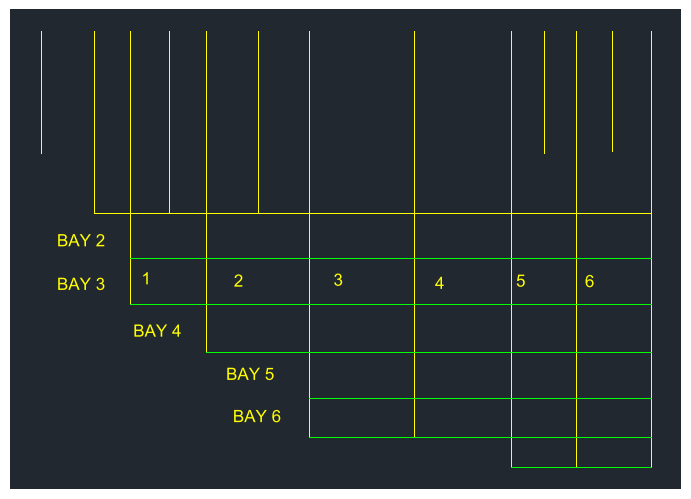

In [30]:
# Write some code to verify the file can be loaded (correct format/version, etc)
try:
    doc, auditor = recover.readfile(filename)
except IOError:
    print(f"Not a DXF file or a generic I/O error.")
    sys.exit(1)
except ezdxf.DXFStructureError:
    print(f"Invalid or corrupted DXF file.")
    sys.exit(2)

# The auditor.errors attribute stores severe errors,
# which may raise exceptions when rendering.
if not auditor.has_errors:
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(doc)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(doc.modelspace(), finalize=True)
    fig.savefig("your.png", dpi=300)

In [34]:
# helper function
def print_entity(e):
    print("LINE on layer: %s\n" % e.dxf.layer)
    print("start point: %s\n" % e.dxf.start)
    print("end point: %s\n" % e.dxf.end)


msp = doc.modelspace()
for e in msp:
    if e.dxftype() == "LINE":
        pass
#        print_entity(e)

## Defining Data to Send to MIDAS

<font color=red>**Note: Open Amtrak Model to demonstrate pulling values from previous files**</font>

In [35]:
moving_load_case = midas_api("get", "db/MVLD")

In [36]:
moving_load_case["Assign"] = moving_load_case.pop("MVLD")

In [37]:
moving_load_code = midas_api("get", "db/MVCD")

In [38]:
moving_load_code["Assign"] = moving_load_code.pop("MVCD")

In [39]:
moving_loads = midas_api("get", "db/MVHL")
rr_286k_Load = moving_loads["MVHL"]["1"]

In [40]:
rr_286k_Load

{'MVLD_CODE': 2,
 'VEHICLE_LOAD_NAME': '286k Car',
 'VEHICLE_LOAD_NUM': 2,
 'VEH_DEFAULT': {'UNIFORM_LOAD': 0,
  'PL': 0,
  'PLM': 0,
  'PLV': 0,
  'NOSE_TAIL_DIST': 0,
  'CENT_F': False},
 'LOAD_ITEMS': [{'POINT_LOAD': 71.3, 'POINT_DIST': 6.58},
  {'POINT_LOAD': 71.3, 'POINT_DIST': 6.58},
  {'POINT_LOAD': 71.3, 'POINT_DIST': 33.33},
  {'POINT_LOAD': 71.3, 'POINT_DIST': 6.58},
  {'POINT_LOAD': 71.3, 'POINT_DIST': 6.58},
  {'POINT_LOAD': 71.3, 'POINT_DIST': 13.58},
  {'POINT_LOAD': 71.3, 'POINT_DIST': 6.58},
  {'POINT_LOAD': 71.3, 'POINT_DIST': 6.58},
  {'POINT_LOAD': 71.3, 'POINT_DIST': 33.33},
  {'POINT_LOAD': 71.3, 'POINT_DIST': 6.58},
  {'POINT_LOAD': 71.3, 'POINT_DIST': 6.58},
  {'POINT_LOAD': 71.5, 'POINT_DIST': 10.14},
  {'POINT_LOAD': 71.5, 'POINT_DIST': 5.83},
  {'POINT_LOAD': 71.5, 'POINT_DIST': 31.23},
  {'POINT_LOAD': 71.5, 'POINT_DIST': 5.83},
  {'POINT_LOAD': 71.5, 'POINT_DIST': 6.800000000000001},
  {'POINT_LOAD': 71.5, 'POINT_DIST': 5.83},
  {'POINT_LOAD': 71.5, 'POINT_D

In [41]:
moving_loads["Assign"] = moving_loads.pop("MVHL")

## Pushing Loads From Previous Project to New One

<font color=red>**Note: Either open a new file or load the Python Example one**</font>

In [42]:
midas_api("put", "db/MVCD", moving_load_code)

{'MVCD': {'1': {'CODE': 'AASHTO LRFD'}}}

In [43]:
midas_api("put", "db/MVHL", moving_loads)

{'MVHL': {'1': {'MVLD_CODE': 2,
   'VEHICLE_LOAD_NAME': '286k Car',
   'VEHICLE_LOAD_NUM': 2,
   'VEH_DEFAULT': {'UNIFORM_LOAD': 0,
    'PL': 0,
    'PLM': 0,
    'PLV': 0,
    'NOSE_TAIL_DIST': 0,
    'CENT_F': False},
   'LOAD_ITEMS': [{'POINT_LOAD': 71.3, 'POINT_DIST': 6.58},
    {'POINT_LOAD': 71.3, 'POINT_DIST': 6.58},
    {'POINT_LOAD': 71.3, 'POINT_DIST': 33.33},
    {'POINT_LOAD': 71.3, 'POINT_DIST': 6.58},
    {'POINT_LOAD': 71.3, 'POINT_DIST': 6.58},
    {'POINT_LOAD': 71.3, 'POINT_DIST': 13.58},
    {'POINT_LOAD': 71.3, 'POINT_DIST': 6.58},
    {'POINT_LOAD': 71.3, 'POINT_DIST': 6.58},
    {'POINT_LOAD': 71.3, 'POINT_DIST': 33.33},
    {'POINT_LOAD': 71.3, 'POINT_DIST': 6.58},
    {'POINT_LOAD': 71.3, 'POINT_DIST': 6.58},
    {'POINT_LOAD': 71.5, 'POINT_DIST': 10.14},
    {'POINT_LOAD': 71.5, 'POINT_DIST': 5.83},
    {'POINT_LOAD': 71.5, 'POINT_DIST': 31.23},
    {'POINT_LOAD': 71.5, 'POINT_DIST': 5.83},
    {'POINT_LOAD': 71.5, 'POINT_DIST': 6.800000000000001},
    {'POINT_

## Running Analysis

In [ ]:
analysis_input = {}

# Results in an error even though it seems to run, not sure why
midas_api("post", "doc/Anal", analysis_input)

## Displaying results

[Example of API Function not currently working](https://midas-support.atlassian.net/wiki/spaces/MAW/pages/161022452/RESULTGRAPHIC+Reaction+Forces+Moments)

In [44]:
rxn_forces = {
    "Argument": {
        "CURRENT_MODE": "reaction forces/moments",
        "LOAD_CASE_COMB": {
            "TYPE": "ST",
            "MINMAX": "max",
            "NAME": "DL",
            "STEP_INDEX": 1,
        },
        "COMPONENTS": {"COMP": "Fxyz", "OPT_LOCAL_CHECK": True},
        "TYPE_OF_DISPLAY": {
            "VALUES": {"OPT_CHECK": True},
            "LEGEND": {"OPT_CHECK": True},
            "ARROW_SCALE_FACTOR": 1.0,
        },
    }
}

In [46]:
midas_api("post", "VIEW/RESULTGRAPHIC", rxn_forces)

{'message': 'error status'}

## Retrieving Results

In [47]:
capture_data = {
    "Assign": {
        "SET_MODE": "pre",
        "SET_HIDDEN": False,
        "EXPORT_PATH": "C:\\Program Files\\MIDAS\\midas Civil\\Tutorial\\api_res\\image.jpg",
        "HEIGHT": 700,
        "WIDTH": 700,
        "ACTIVE": {"ACTIVE_MODE": "All"},
        "ANGLE": {"HORIZONTAL": 30, "VERTICAL": 15},
        "DISPLAY": {"NODE": {"NODE": True, "NODE_NUMBER": False}},
    }
}

midas_api("POST", "view/CAPTURE", capture_data)

{'error': {'message': 'Interner Error!'}}

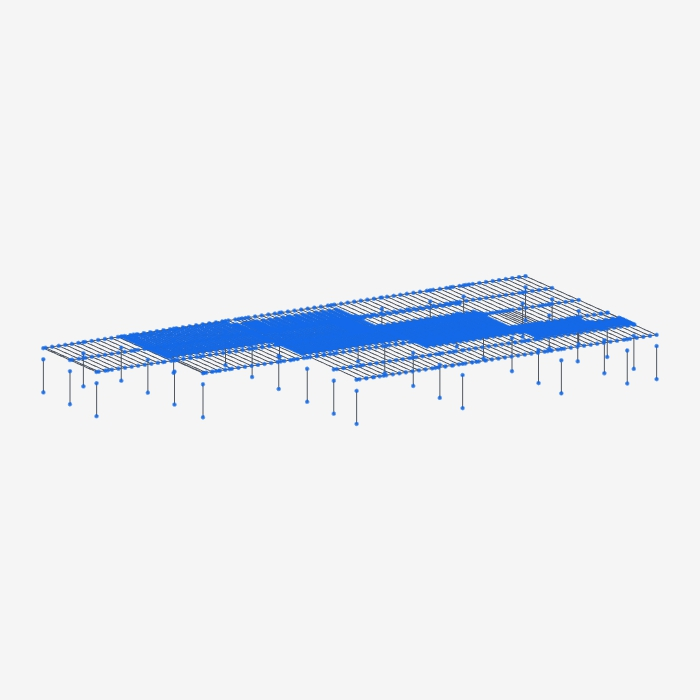

In [48]:
from IPython.display import Image

Image(filename="C:\\Program Files\\MIDAS\\midas Civil\\Tutorial\\api_res\\image.jpg")

## Outputting to Table

In [49]:
import pandas as pd

elements = get_elements()

df = pd.DataFrame.from_records(elements["ELEM"]).transpose()
df

,TYPE,MATL,SECT,NODE,ANGLE,STYPE
10001,BEAM,1,1,"[406, 424, 0, 0, 0, 0, 0, 0]",0,0
10002,BEAM,1,1,"[272, 868, 0, 0, 0, 0, 0, 0]",0,0
10003,BEAM,1,1,"[270, 865, 0, 0, 0, 0, 0, 0]",0,0
10004,BEAM,1,1,"[815, 253, 0, 0, 0, 0, 0, 0]",0,0
10005,BEAM,1,1,"[819, 255, 0, 0, 0, 0, 0, 0]",0,0
...,...,...,...,...,...,...
9183,BEAM,1,1,"[862, 863, 0, 0, 0, 0, 0, 0]",0,0
9184,BEAM,1,1,"[2299, 864, 0, 0, 0, 0, 0, 0]",0,0
9185,BEAM,1,1,"[860, 861, 0, 0, 0, 0, 0, 0]",0,0
9186,BEAM,1,1,"[861, 585, 0, 0, 0, 0, 0, 0]",0,0


**Outputting to excel**

Note: It's kind of a bad practice to do it, fine to verify select values, but it's better to keep the logic on the python side and manipulate the values within the pandas table.

In [50]:
df.to_excel("output/results.xlsx")

## Outputting to Report

for cells you don't want to display in the report (Not Recommended) change their tag to 'hide-input'.

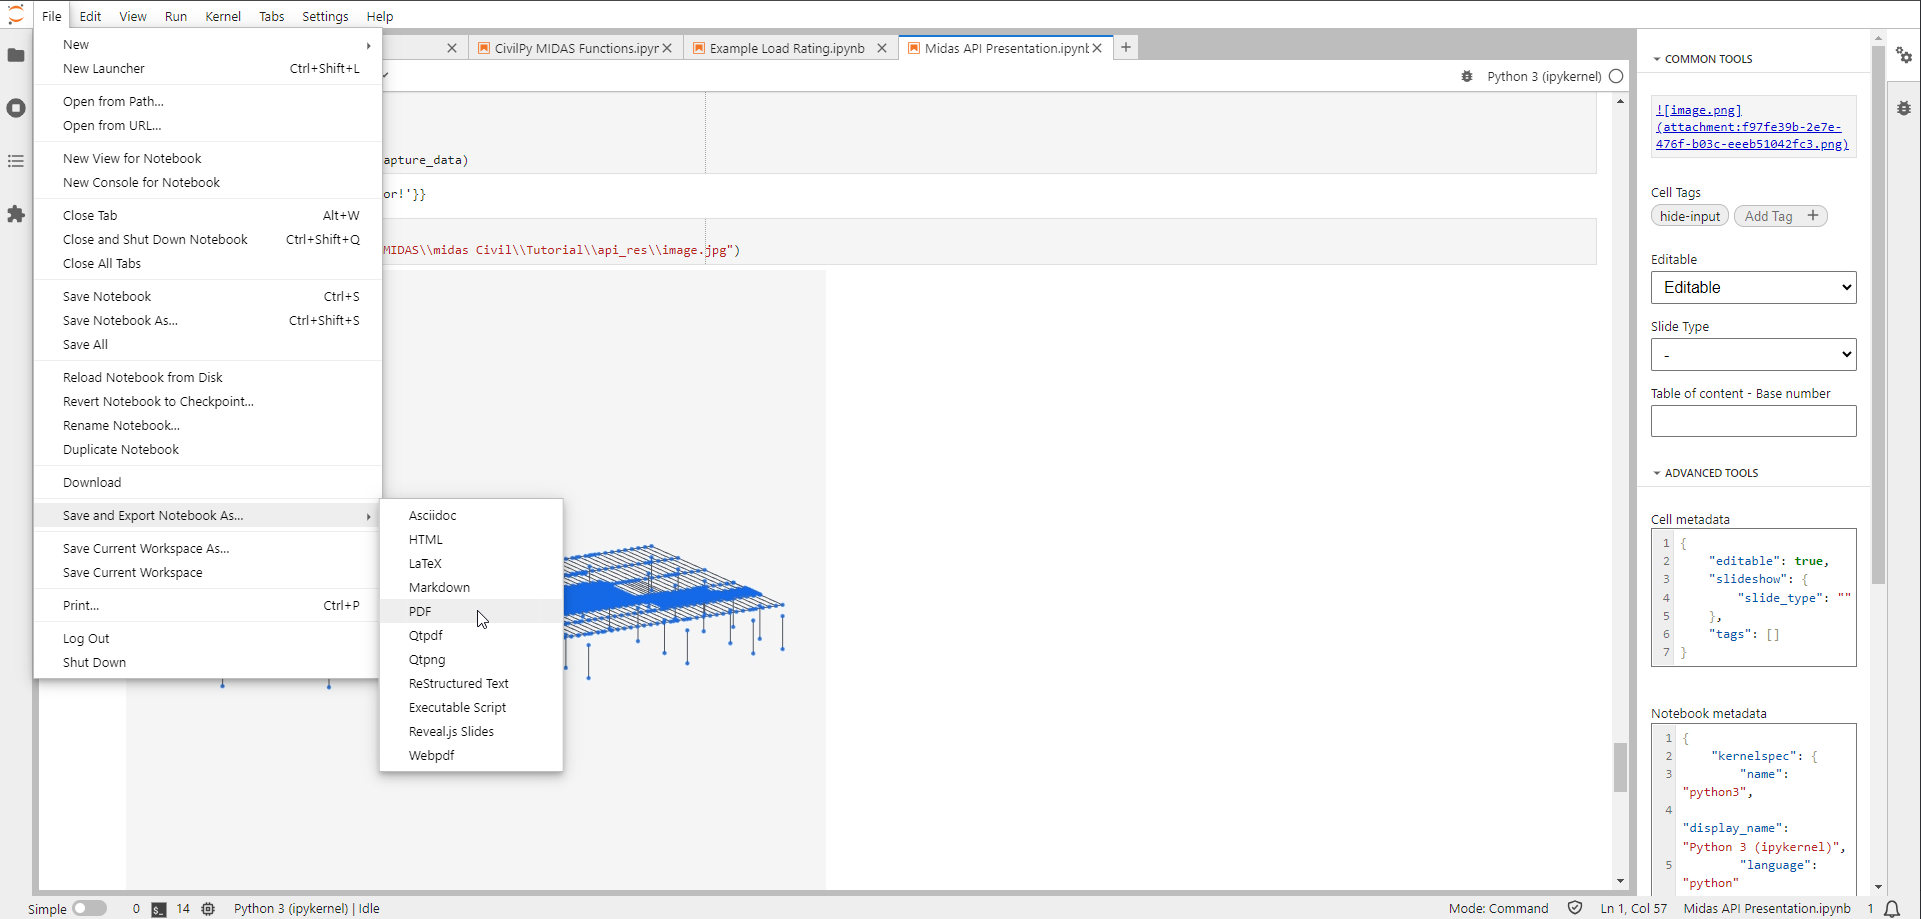

In [51]:
from IPython.display import Image

Image(
    filename=r"C:\Users\dane.parks\PycharmProjects\civilpy\Notebooks\res\imgs\MIDAS_API.png"
)

The above can also be run via the command line without having to have jupyter open:

```bash
jupyter nbconvert "C:\Users\dane.parks\PycharmProjects\civilpy\Training\MIDAS API Presentation.ipynb" --to=pdf --TemplateExporter.exclude_input=True
```

# Conclusion

Still a new product, still a lot to learn and build to get it working.

Additional Resources:

[API 'Testing' File](https://daneparks.com/Dane/civilpy/-/blob/master/Notebooks/MIDAS%20API.ipynb?ref_type=heads)

[Python Functions to utilize the API](https://daneparks.com/Dane/civilpy/-/blob/master/Notebooks/CivilPy%20MIDAS%20Functions.ipynb?ref_type=heads)

# How to Learn Python

[Automate the Boring Stuff Book](https://automatetheboringstuff.com/)

[Automate the Boring Stuff Course](https://www.udemy.com/course/automate/?couponCode=MAR2024CODE) (currently like 85% off, regularly given away by Al Sweigert for free on Reddit)